In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unrar x "/content/drive/MyDrive/ML Datasets for colab/dataset.rar" "/content"

Streaming output truncated to the last 5000 lines.
Extracting  /content/dataset/train/COVID/01479.jpg                        30%  OK 
Extracting  /content/dataset/train/COVID/01480.jpg                        30%  OK 
Extracting  /content/dataset/train/COVID/01481.jpg                        30%  OK 
Extracting  /content/dataset/train/COVID/01482.jpg                        30%  OK 
Extracting  /content/dataset/train/COVID/01483.jpg                        30%  OK 
Extracting  /content/dataset/train/COVID/01484.jpg                        30%  OK 
Extracting  /content/dataset/train/COVID/01485.jpg                        30%  OK 
Extracting  /content/dataset/train/COVID/01486.jpg                        30%  OK 
Extracting  /content/dataset/train/COVID/01487.jpg                        30%  OK 
Extracting  /content/dataset/train/COVID/01488.jpg                        30%  OK 
Extracting  /content/dataset/

In [3]:
trainpath = "/content/dataset/train"
testpath = "/content/dataset/test"

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255 , shear_range = 0.2 , zoom_range =0.2 , horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(trainpath , target_size = (224,224) , batch_size=32 , class_mode='categorical' , shuffle=True)
test_set = test_datagen.flow_from_directory(testpath , target_size=(224,224) , batch_size=32, class_mode = 'categorical', shuffle=False , seed = 4)

Found 5744 images belonging to 2 classes.
Found 1512 images belonging to 2 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [7]:
model = Sequential()
model.add(Conv2D(filters = 64 , kernel_size=(3 , 3),  padding="same", input_shape=(224,224,3), activation='relu'))
model.add(Conv2D(filters=64 , kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(units= 512,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=512,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units= 2, activation="softmax"))



model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics =['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 64)        3

In [10]:
 history = model.fit(training_set, steps_per_epoch = 100, epochs = 50, validation_data = test_set, validation_steps = 25 )

Epoch 1/50
100/100 [==============================] - 107s 586ms/step - loss: 1.0828 - accuracy: 0.5140 - val_loss: 0.6928 - val_accuracy: 0.5138
Epoch 2/50
100/100 [==============================] - 57s 565ms/step - loss: 0.6846 - accuracy: 0.5446 - val_loss: 0.6880 - val_accuracy: 0.5900
Epoch 3/50
100/100 [==============================] - 56s 558ms/step - loss: 0.6717 - accuracy: 0.5936 - val_loss: 0.6529 - val_accuracy: 0.6000
Epoch 4/50
100/100 [==============================] - 56s 553ms/step - loss: 0.6239 - accuracy: 0.6549 - val_loss: 0.6509 - val_accuracy: 0.6225
Epoch 5/50
100/100 [==============================] - 56s 557ms/step - loss: 0.6020 - accuracy: 0.6681 - val_loss: 0.5324 - val_accuracy: 0.7450
Epoch 6/50
100/100 [==============================] - 56s 559ms/step - loss: 0.5326 - accuracy: 0.7318 - val_loss: 0.4301 - val_accuracy: 0.8125
Epoch 7/50
100/100 [==============================] - 56s 558ms/step - loss: 0.4696 - accuracy: 0.7745 - val_loss: 0.4627 - val_a

In [11]:
model.save("/content/model.h5")

In [13]:
import keras
path = "/content/model.h5"
model2 = keras.models.load_model(path)

Found 2424 images belonging to 3 classes.


In [18]:
def evaluate_model(model, generator, nBatches):
    score = model.evaluate_generator(generator=generator,               # Generator yielding tuples
                                     steps=generator.samples//nBatches, # number of steps (batches of samples) to yield from generator before stopping
                                     max_queue_size=10,                 # maximum size for the generator queue
                                     workers=1,                         # maximum number of processes to spin up when using process based threading
                                     use_multiprocessing=False,         # whether to use process-based threading
                                     verbose=0)
    print("loss: %.3f - acc: %.3f" % (score[0], score[1]))

In [20]:
evaluate_model(model , test_set, 32)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


loss: 0.137 - acc: 0.960


In [21]:
ytest = test_set.classes[test_set.index_array]
print(ytest)

[0 0 0 ... 1 1 1]


In [28]:
def evaluate_predictions(model, generator, nBatches):
    predictions = model.predict_generator(generator=generator,
                                    steps=generator.samples/nBatches,
                                    max_queue_size=10,
                                    workers=0,
                                    use_multiprocessing=False,
                                    verbose=0)

    # Evaluate predictions
    predictedClass = np.argmax(predictions, axis=1)
    trueClass = generator.classes[generator.index_array]
    classLabels = list(generator.class_indices.keys())

    # Create confusion matrix
    confusionMatrix = (confusion_matrix(
        y_true=trueClass,                                       # ground truth (correct) target values
        y_pred=predictedClass))                                 # estimated targets as returned by a classifier
    print(confusionMatrix)
    target_names = ["Covid" , "Normal"]
    print(classification_report(generator.classes, predictedClass, target_names=target_names))

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
evaluate_predictions(model , test_set, 32)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[[711  21]
 [ 39 741]]
              precision    recall  f1-score   support

       Covid       0.95      0.97      0.96       732
      Normal       0.97      0.95      0.96       780

    accuracy                           0.96      1512
   macro avg       0.96      0.96      0.96      1512
weighted avg       0.96      0.96      0.96      1512



In [32]:
hist = history
type(hist)

keras.callbacks.History

In [34]:
import matplotlib.pyplot as plt

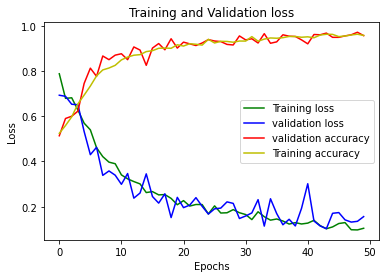

In [36]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
acc_val = hist.history['val_accuracy']
acc_train = hist.history['accuracy']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.plot(epochs, acc_val, 'r', label='validation accuracy')
plt.plot(epochs, acc_train, 'y', label='Training accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()